In [1]:
# Reddit data analysis task starter.
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pauli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# First collect the data in json-file (follow reddit_collect_data.ipynb); specify file name here
fjson = 'raw_post_comment_data.json'

In [3]:
# read json file with collected posts and comments
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

30

In [4]:
# data record example
data[0]

{'id': 'uufpmy',
 'title': 'Update to Rule #5: Posting an explicit spoiler in the title of your post will result in a 72-hour ban',
 'text': "Not much to say here. If your post has an explicit spoiler in the title of said you will receive a 72-hour ban. Repeat offenders will receive a week ban. Third offense will result in a permanent ban - mostly just to get attention, but doing this is selfish and inconsiderate to be frank.\n\n***\n\nWhat does explicit mean? Often we see the word explicit meaning something involving nudity or sexual scenes, and while it does have a meaning there, in this context it means to post a spoiler that in no uncertain terms spells out what happens in a storyline.\n\n***\n\nAlso, going forward we will be taking mod applications for day to day work to help enforce this and the other part of rule #5 involving properly tagging posts. At a certain point /u/Automoderator will automatically flag any post that does not meet the proper syntax outlined in Rule #5. Read

In [5]:
# create pandas dataframe from post titles
# https://stackoverflow.com/a/43175477
df_posts = pd.DataFrame([p['title'] for p in data], columns=['title'])
df_posts

,title
0,Update to Rule #5: Posting an explicit spoiler...
1,Season 18 Episode 19 Out For Blood and Episode...
2,I loved Dr. Thomas and his friendship/banter w...
3,It’s shocking that she never got a story line 😄
4,Y’all. Meredith Grey’s house
5,😭🤣
6,I don’t know that Owen would approve… I saw th...
7,Which pairings who didn’t end up or stayed tog...
8,Some hospital codes cited in Grey's Anatomy
9,💀🤣


In [6]:
# add columns from other data fields: combine comment and sub-comment text
df_posts['post_id'] = [p['id'] for p in data]
df_posts['text'] = [p['text'] for p in data]
df_posts['comments_lev1'] = [' '.join(p['comments_lev1']) for p in data]
df_posts['comments_lev2'] = [' '.join(p['comments_lev2']) for p in data]
df_posts

,title,post_id,text,comments_lev1,comments_lev2
0,Update to Rule #5: Posting an explicit spoiler...,uufpmy,Not much to say here. If your post has an expl...,">Also, going forward we will be taking mod app...",God yes!!! Promos are absolutely spoilers and ...
1,Season 18 Episode 19 Out For Blood and Episode...,uyl3wb,Discussion post for Grey’s Anatomy season 18 f...,Shonda really classically conditioned us to cr...,Just looked them up - all Greys classics for 1...
2,I loved Dr. Thomas and his friendship/banter w...,wa7f5w,,FEENY i wish they would’ve kept him on as a pe...,I really enjoyed them. I know Cristina initial...
3,It’s shocking that she never got a story line 😄,wabef5,,Honestly it’s better that she doesn’t have a s...,"Facts 😭 She spoke one line, that one time when..."
4,Y’all. Meredith Grey’s house,w9ufzt,,I love this house but I told my husband that i...,Good luck on the mega millions!! We bought one...
5,😭🤣,w9l0r5,,Love this. Kinda wonder if one with crying wou...,💀😭😭🤣🤣🤣 🤣🤣😭
6,I don’t know that Owen would approve… I saw th...,wadvj4,,This cookie smells like Owen Enough internet f...,
7,Which pairings who didn’t end up or stayed tog...,wafuk1,,When was this?? My first time seeing these sce...,"Those are deleted scenes. Sadly, they never ma..."
8,Some hospital codes cited in Grey's Anatomy,wa7tkg,,"There's also code silver/ ""silver flood"", whic...",I was going to say that Usually a shooter is c...
9,💀🤣,waeshs,,,


In [7]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [8]:
# add clean text column with combined comments of both levels
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_posts['text_clean'] = (df_posts['text'] + df_posts['comments_lev1'] + df_posts['comments_lev2']).apply(text_cleanup)
df_posts

,title,post_id,text,comments_lev1,comments_lev2,text_clean
0,Update to Rule #5: Posting an explicit spoiler...,uufpmy,Not much to say here. If your post has an expl...,">Also, going forward we will be taking mod app...",God yes!!! Promos are absolutely spoilers and ...,much say post explicit spoiler title said rece...
1,Season 18 Episode 19 Out For Blood and Episode...,uyl3wb,Discussion post for Grey’s Anatomy season 18 f...,Shonda really classically conditioned us to cr...,Just looked them up - all Greys classics for 1...,discussion post greys anatomy season 18 finale...
2,I loved Dr. Thomas and his friendship/banter w...,wa7f5w,,FEENY i wish they would’ve kept him on as a pe...,I really enjoyed them. I know Cristina initial...,feeny wish wouldve kept permanent cast member ...
3,It’s shocking that she never got a story line 😄,wabef5,,Honestly it’s better that she doesn’t have a s...,"Facts 😭 She spoke one line, that one time when...",honestly better doesnt storyline cause writers...
4,Y’all. Meredith Grey’s house,w9ufzt,,I love this house but I told my husband that i...,Good luck on the mega millions!! We bought one...,love house told husband ever lottery want buil...
5,😭🤣,w9l0r5,,Love this. Kinda wonder if one with crying wou...,💀😭😭🤣🤣🤣 🤣🤣😭,love kinda wonder one crying would work thinki...
6,I don’t know that Owen would approve… I saw th...,wadvj4,,This cookie smells like Owen Enough internet f...,,cookie smells like owen enough internet today ...
7,Which pairings who didn’t end up or stayed tog...,wafuk1,,When was this?? My first time seeing these sce...,"Those are deleted scenes. Sadly, they never ma...",first time seeing scenes mer riggs mer hayes c...
8,Some hospital codes cited in Grey's Anatomy,wa7tkg,,"There's also code silver/ ""silver flood"", whic...",I was going to say that Usually a shooter is c...,also code silver flood meant large group elder...
9,💀🤣,waeshs,,,,


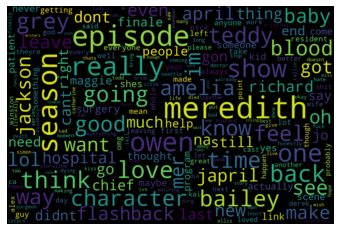

In [9]:
# most common keywords
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
text_combined = ' '.join(df_posts['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [10]:
# extract keyword counts
# https://stackoverflow.com/questions/60234036/python-word-count-from-wordcloud
kwords = WordCloud().process_text(text_combined)
kwords

{'much': 52,
 'say': 46,
 'post': 19,
 'explicit': 4,
 'spoiler': 17,
 'title': 6,
 'said': 34,
 'receive': 2,
 'ban': 4,
 'repeat': 2,
 'offenders': 1,
 'week': 13,
 'third': 2,
 'offense': 1,
 'result': 3,
 'permanent': 2,
 'mostly': 6,
 'attention': 3,
 'selfish': 9,
 'inconsiderate': 1,
 'frank': 1,
 'mean': 35,
 'often': 1,
 'see': 73,
 'word': 4,
 'meaning': 2,
 'something': 36,
 'involving': 3,
 'nudity': 1,
 'sexual': 4,
 'context': 2,
 'uncertain': 1,
 'terms': 4,
 'spells': 1,
 'storyline': 29,
 'going': 90,
 'forward': 5,
 'taking': 11,
 'mod': 2,
 'day': 30,
 'work': 30,
 'help': 44,
 'enforce': 2,
 'part': 16,
 'rule': 15,
 'properly': 3,
 'certain': 4,
 'point': 30,
 'automatically': 2,
 'flag': 1,
 'meet': 11,
 'proper': 2,
 'syntax': 1,
 'outlined': 1,
 'read': 8,
 'follow': 5,
 'fine': 10,
 'refresher': 1,
 'pertains': 2,
 'episode': 144,
 'potential': 5,
 'please': 25,
 'put': 22,
 'season': 109,
 'inside': 3,
 'brackets': 2,
 'beginning': 7,
 'instance': 2,
 's09e20'

In [11]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
much,52
say,46
post,19
explicit,4
spoiler,17
...,...
couldnt stand,3
held accountable,2
mike chang,6


<AxesSubplot:xlabel='keyword'>

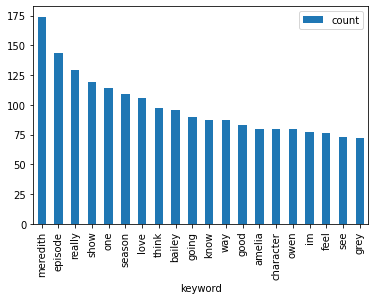

In [12]:
# plot a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

In [13]:
# NLTK collocations search (words occuring together): bigrams
# https://www.nltk.org/howto/collocations.html
# http://www.nltk.org/api/nltk.html#nltk.util.bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_posts['text_clean']])

In [14]:
# filter out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [15]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('discussion', 'threads'), 3),
 (('weekly', 'discussion'), 3),
 (('discussion', 'thread'), 3),
 (('many', 'people'), 4),
 (('greys', 'anatomy'), 5),
 (('season', '18'), 4),
 (('episode', '19'), 3),
 (('19', 'episode'), 3),
 (('blood', 'shortage'), 10),
 (('grey', 'sloan'), 16),
 (('episode', '20'), 6),
 (('cry', 'every'), 3),
 (('every', 'time'), 8),
 (('chasing', 'cars'), 13),
 (('really', 'thought'), 3),
 (('thought', 'amelia'), 3),
 (('amelia', 'get'), 3),
 (('nuh', 'uh'), 3),
 (('would', 'know'), 4),
 (('series', 'finale'), 17),
 (('fake', 'baby'), 8),
 (('anyone', 'else'), 13),
 (('feel', 'like'), 34),
 (('sometimes', 'love'), 4),
 (('love', 'comes'), 4),
 (('comes', 'back'), 5),
 (('back', 'around'), 5),
 (('come', 'back'), 11),
 (('program', 'meredith'), 3),
 (('wow', 'really'), 3),
 (('really', 'gon'), 3),
 (('gon', 'na'), 51),
 (('owen', 'teddy'), 35),
 (('sex', 'bear'), 6),
 (('parking', 'lot'), 4),
 (('residency', 'program'), 16),
 (('meredith', 'leaving'), 6),
 (('japril'

In [16]:
# collect into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
gon na,51
owen teddy,35
feel like,34
next season,22
teddy owen,20
...,...
love seeing,3
meet baby,3
18 years,3


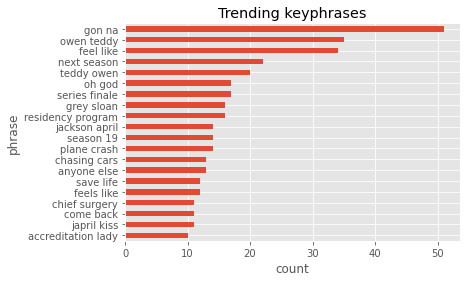

In [17]:
plt.style.use('ggplot')

# render a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()